In [129]:
import numpy as np
import matplotlib.pyplot as plt
from hist import Hist
from lmfit.models import SkewedGaussianModel
from scipy.stats import skewnorm
from pathlib import Path
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

This notebook is part of the analysis of the cosmogenic background analysis at different underground sites. 
The purpose is to process the distribution of xenon-137 atoms generated from the toy MC code that includes the efficiencies for muon tagging and the n-capture tagging. The processing here is to transform the distributions in a way that can be used by the sensitivity code 

# Distributions

These are the input data from the toy-MC in form of histogram. Bins are in units of counts in 10 years in the full LXe, so we normalize in units of kg/y

In [53]:
dist_dict = {}

In [54]:
counts = [6, 7, 27, 35, 85, 96, 119, 136, 116, 97, 84, 55, 48, 41, 18,  8, 13,  1,  6,  2]
bins = [2533., 2566.3, 2599.6, 2632.9, 2666.2, 2699.5, 2732.8, 2766.1, 2799.4, 2832.7, 2866., 2899.3, 2932.6, 2965.9, 2999.2, 3032.5, 3065.8, 3099.1, 3132.4, 3165.7, 3199.]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['LNGS_Eff70'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [145]:
counts = [ 1,  1,  2,  2,  2,  1,  4,  8,  8,  9,  6, 18,  7, 13,  5,  2,  4,  2, 3,  2]
bins = [1583.  , 1596.05, 1609.1 , 1622.15, 1635.2 , 1648.25, 1661.3 , 1674.35, 1687.4, 1700.45, 1713.5 , 1726.55, 1739.6 , 1752.65, 1765.7 , 1778.75, 1791.8 , 1804.85, 1817.9 , 1830.95, 1844.  ]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['LNGS_Eff74'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [155]:
counts = [3, 0, 2, 12, 8, 14, 20, 10, 12, 7, 1, 5, 2, 2, 1, 0, 0, 0, 0, 1]
bins = [1426., 1446.95, 1467.9, 1488.85, 1509.8, 1530.75, 1551.7, 1572.65, 1593.6, 1614.55, 1635.5, 1656.45, 1677.4, 1698.35, 1719.3, 1740.25, 1761.2, 1782.15, 1803.1, 1824.05, 1845.]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['LNGS_Eff80'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [156]:
counts = [ 1,  2,  0,  2,  5,  3,  5, 13, 11, 10, 16, 10,  8,  3,  1,  4,  4,  1, 0,  1]
bins = [503., 510.65, 518.3 , 525.95, 533.6 , 541.25, 548.9 , 556.55, 564.2 , 571.85, 579.5 , 587.15, 594.8 , 602.45, 610.1 , 617.75, 625.4 , 633.05, 640.7 , 648.35, 656.  ]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['LNGS_Eff93'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [147]:
counts = [1, 1, 2, 1, 5, 10, 6, 12, 13, 15, 14, 5, 4, 6, 3, 1, 0, 0, 0, 1]
bins = [287., 293.7, 300.4, 307.1, 313.8, 320.5, 327.2, 333.9, 340.6, 347.3, 354., 360.7, 367.4, 374.1, 380.8, 387.5, 394.2, 400.9, 407.6, 414.3, 421., ]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['SURF_Eff70'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [57]:
counts = [2, 1, 1, 3, 7, 6, 8, 12, 8, 7, 6, 8, 6, 7, 8, 5, 2, 2, 0, 1]
bins = [193., 197.15, 201.3, 205.45, 209.6, 213.75, 217.9, 222.05, 226.2, 230.35, 234.5, 238.65, 242.8, 246.95, 251.1, 255.25, 259.4, 263.55, 267.7, 271.85, 276., ]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['SURF_Eff80'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [58]:
counts = [129, 1267, 3508, 3233, 1353, 373, 62, 27, 23, 9, 10, 0, 0, 0, 0, 0, 0, 1, 3, 2]
bins = [9., 15.2, 21.4, 27.6, 33.8, 40., 46.2, 52.4, 58.6, 64.8, 71., 77.2, 83.4, 89.6, 95.8, 102., 108.2, 114.4, 120.6, 126.8, 133.]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['SNOLAB_Eff70'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [138]:
counts = [ 2,  0, 10, 10, 24, 24, 45, 34, 67, 40, 34, 47, 17, 25, 12,  6,  1,  1, 0,  1]
bins = [ 6.  ,  7.45,  8.9 , 10.35, 11.8 , 13.25, 14.7 , 16.15, 17.6 , 19.05, 20.5 , 21.95, 23.4 , 24.85, 26.3 , 27.75, 29.2 , 30.65, 32.1 , 33.55, 35.  ]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['SNOLAB_Eff74'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [59]:
counts = [1, 2, 2, 8, 9, 17, 18, 5, 15, 5, 6, 7, 2, 2, 0, 0, 0, 0, 0, 1]
bins = [7., 8.6, 10.2, 11.8, 13.4, 15., 16.6, 18.2, 19.8, 21.4, 23., 24.6, 26.2, 27.8, 29.4, 31., 32.6, 34.2, 35.8, 37.4, 39., ]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['SNOLAB_Eff80'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [151]:
counts = [ 1,  2, 16,  0, 27, 55,  0, 57, 64,  0, 46, 46, 32,  0, 24, 17,  0,  5, 7,  1]
bins = [ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,  7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. ]
hints = {'amplitude': 1, 'center':1, 'sigma':0.4, 'gamma':1}
dist_dict['SNOLAB_Eff93'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

In [126]:
counts = [1, 0, 4, 2, 0, 1, 2, 1, 2, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1]
bins = [17533. , 17565.9, 17598.8, 17631.7, 17664.6, 17697.5, 17730.4, 17763.3, 17796.2, 17829.1, 17862. , 17894.9, 17927.8, 17960.7, 17993.6, 18026.5,18059.4, 18092.3, 18125.2, 18158.1, 18191. ]
hints = {'amplitude': 10, 'center':0.5, 'sigma':0.01, 'gamma':3}
dist_dict['WIPP_Eff70'] = {'counts':counts, 'bins':np.array(bins)/10./4896., 'hints':hints}

## LNGS_Eff70
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: 2.189349688990879
    loc: 0.05499667059517516
    scale: 0.003253980744928109




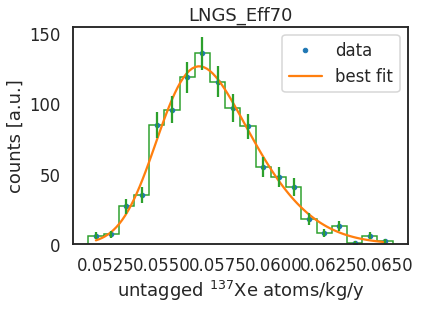

## LNGS_Eff80
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: 1.6144005396821521
    loc: 0.030982223178905685
    scale: 0.0014665113523260054




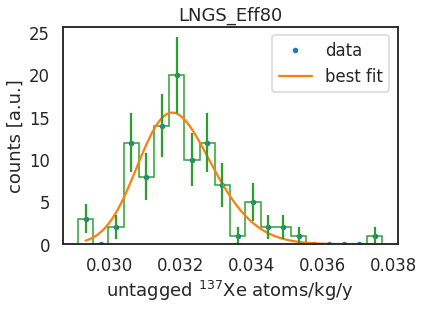

## SURF_Eff70
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: -1.1470272620412725
    loc: 0.007347809308748012
    scale: 0.0004960314136825961




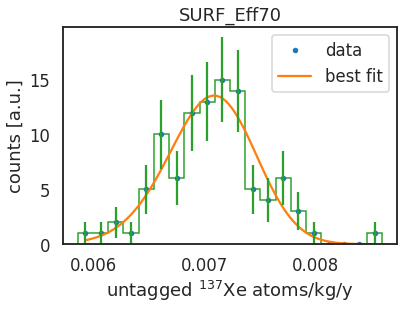

## SURF_Eff80
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: 3.8097464355650303
    loc: 0.004317179017773809
    scale: 0.0006690078384303799




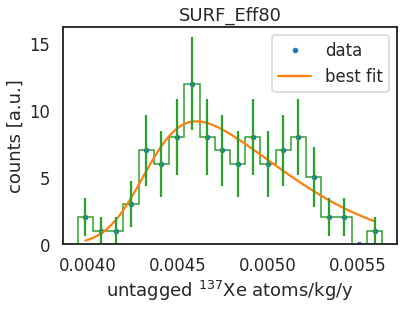

## SNOLAB_Eff70
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: 1.5610828187332408
    loc: 0.00045139723825705203
    scale: 0.00018211524534939016




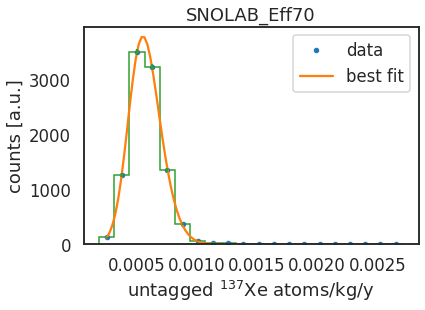

## SNOLAB_Eff80
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: 3.355427790778958
    loc: 0.00026968631632917026
    scale: 0.0001449830300348509




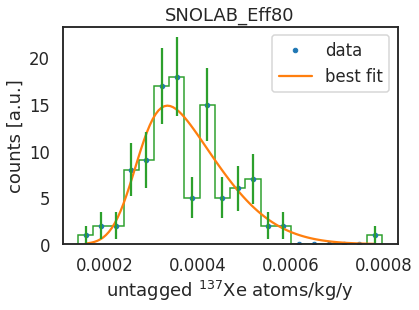

## WIPP_Eff70
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: 3.0
    loc: 0.5
    scale: 0.010000000000000009




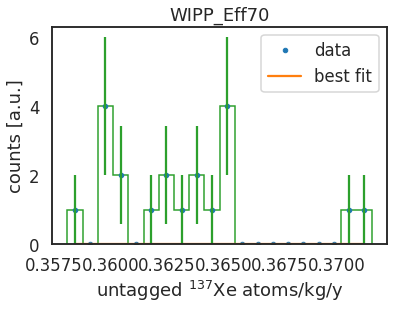

## SNOLAB_Eff74
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: -0.006972257002212964
    loc: 0.00038497334124029854
    scale: 9.681380079107349e-05




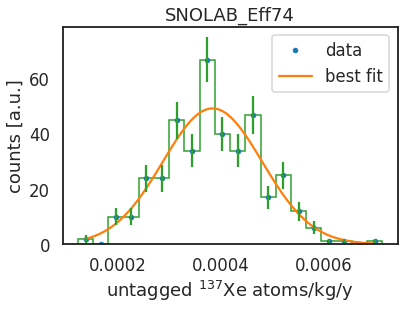

## LNGS_Eff74
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: -1.7645188798645501
    loc: 0.03610358838352065
    scale: 0.0012776216963994447




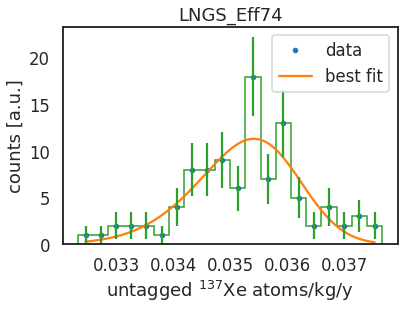

## SNOLAB_Eff93
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: 1.9590575332308107
    loc: 7.528799174908533e-05
    scale: 8.198137266690608e-05




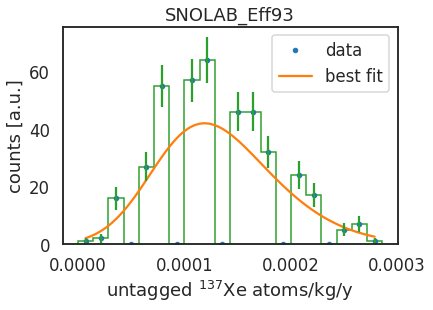

## LNGS_Eff93
Xe137DistributionModel: 
    dist: 'skewnorm'
    a: -1.2462449834145441
    loc: 0.012108211396980286
    scale: 0.0005839448442623851




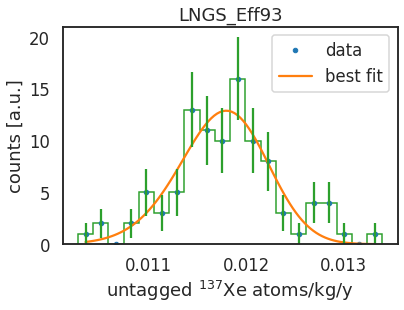

In [157]:
results = {}
for label, v in dist_dict.items():
    print(f'## {label}')
    h = Hist.new.Regular(len(v['counts']), v['bins'][0], v['bins'][-1], name='cts/kg/y').Double()
    h[:] = v['counts']
    model = SkewedGaussianModel() 
    params = model.make_params(**v['hints'])
    result = model.fit(v['counts'], params, x=h.axes[0].centers)
    results[label] = result
    print("Xe137DistributionModel: ")
    print("    dist: 'skewnorm'")
    print(f"    a: {result.best_values['gamma']}")    
    print(f"    loc: {result.best_values['center']}")
    print(f"    scale: {result.best_values['sigma']}\n\n")
    # print(result.fit_report())
    result.plot_fit(datafmt='.', numpoints=100)
    h.plot()
    plt.xlabel('untagged $^{137}$Xe atoms/kg/y')
    plt.ylabel('counts [a.u.]')
    plt.title(label)
    plt.show()

In [158]:
ref_spec_activ = 2.684796228e-8 # mBq/kg, from R-088.1 materials db
with open(Path('results') / 'spec_activities.txt', 'a') as f:
    for label, r in results.items():
        rv = skewnorm(r.best_values['gamma'],
                    loc = r.best_values['center'],
                    scale = r.best_values['sigma'])
        mean_xe137_spec_activ = rv.mean() * 1000 / (365 * 24 * 3600)
        print(f'{label}\t{mean_xe137_spec_activ}\t{mean_xe137_spec_activ/ref_spec_activ}')
        print(f'{label}\t{mean_xe137_spec_activ}\t{mean_xe137_spec_activ/ref_spec_activ}', file=f)

LNGS_Eff70	1.8188192811496053e-06	67.7451518361417
LNGS_Eff80	1.013982627925199e-06	37.76758240905868
SURF_Eff70	2.235377931015566e-07	8.326061798294385
SURF_Eff80	1.5326865079248905e-07	5.708762892097189
SNOLAB_Eff70	1.8193582994884675e-08	0.6776522853072436
SNOLAB_Eff80	1.2067081620076432e-08	0.44945986940191845
WIPP_Eff70	1.6094920014144483e-05	599.4838582641395
SNOLAB_Eff74	1.2190346705808406e-08	0.45405109626846535
LNGS_Eff74	1.1167147161650184e-06	41.59402134578008
SNOLAB_Eff93	4.234792759724587e-09	0.15773237147607416
LNGS_Eff93	3.724256796940991e-07	13.871655353580863


Let's normalize and scale the units

In [15]:
pdf = np.array(counts) / float(sum(counts))
bins = np.array(bins)/10./4896.

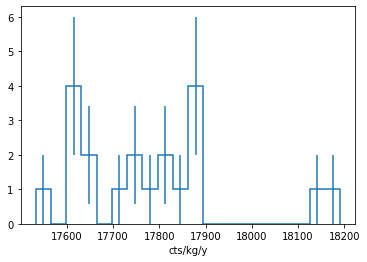

In [99]:
h = Hist.new.Regular(20, bins[0], bins[-1], name='cts/kg/y').Double()
h[:] = counts
h.plot()
plt.show()

The output of the next cell can be copied in the sensitivity configuration file for use as a discrete distribution from which samples are drawn

In [100]:
bin_centers = h.axes[0].centers
print("counts: [", end='')
print(*counts, sep=', ', end=']\n')
print("bin_centers: [", end='')
print(*bin_centers, sep=', ', end=']\n')

counts: [1, 0, 4, 2, 0, 1, 2, 1, 2, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1]
bin_centers: [17549.45, 17582.350000000002, 17615.25, 17648.149999999998, 17681.05, 17713.95, 17746.850000000002, 17779.75, 17812.649999999998, 17845.550000000003, 17878.449999999997, 17911.35, 17944.25, 17977.15, 18010.050000000003, 18042.95, 18075.85, 18108.75, 18141.649999999998, 18174.55]


Now we fit with a function so we can use a continuous distribution from sampling. We use `lmfit` because it's so much more convenient

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 619
    # data points      = 20
    # variables        = 4
    chi-square         = 68.7280521
    reduced chi-square = 4.29550325
    Akaike info crit   = 32.6885034
    Bayesian info crit = 36.6714325
    R-squared          = 0.86783067
[[Variables]]
    amplitude:  0.01434116 +/- 0.00119535 (8.34%) (init = 1)
    center:     0.00449233 +/- 7.6718e-05 (1.71%) (init = 1)
    sigma:      6.0327e-04 +/- 1.0566e-04 (17.51%) (init = 0.4)
    gamma:      2.22809659 +/- 1.20707744 (54.18%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.863
    C(sigma, gamma)      = 0.829
    C(center, gamma)     = -0.812
    C(amplitude, sigma)  = 0.385
    C(amplitude, center) = -0.254


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x2aab8aac0b80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

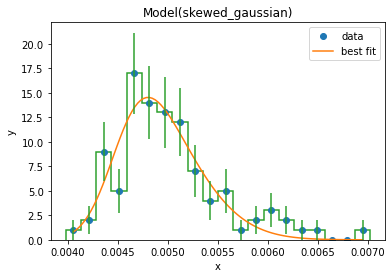

In [18]:
from lmfit.models import SkewedGaussianModel
model = SkewedGaussianModel() 
params = model.make_params(amplitude=1, center=1, sigma=0.4, gamma=1)
result = model.fit(counts, params, x=bin_centers)
print(result.fit_report())
result.plot_fit(numpoints=100)
h.plot()
# plt.semilogy()

We can now apply the fitting results to the scipy equivalent distribution, which has a fast implementation. 

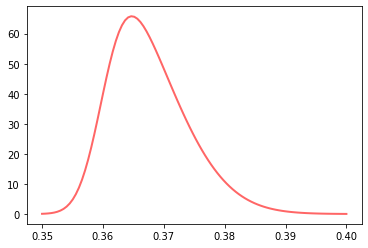

In [125]:
from scipy.stats import skewnorm
x = np.linspace(0.35, 0.4, 100)
# h.plot()
# plt.plot(x, result.params['amplitude'].value*skewnorm.pdf(x, result.params['gamma'].value, 
#                                                           loc=result.params['center'].value, 
#                                                           scale=result.params['sigma'].value),
#                         'r-', lw=2, alpha=0.6, label='skewnorm pdf')
plt.plot(x, skewnorm.pdf(x, 3., 
                                                          loc=0.36, 
                                                          scale=0.01),
                        'r-', lw=2, alpha=0.6, label='skewnorm pdf')


## Test Sampling

Here we show how one would reload and use the saved fitted function

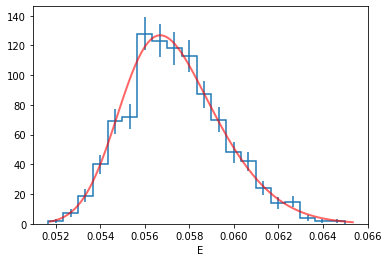

In [275]:
rv = skewnorm(result.params['gamma'].value,loc=result.params['center'].value, 
                                            scale=result.params['sigma'].value)
samples = rv.rvs(size=1000)
h_sampled= Hist.new.Regular(20, min(samples), max(samples), name='E').Double()
h_sampled.fill(samples)
h_sampled.plot()
plt.plot(x, result.params['amplitude'].value*rv.pdf(x),
                        'r-', lw=2, alpha=0.6, label='skewnorm pdf')
plt.show()

In [276]:
rv.mean()

0.05735828476842395

Here is how one could do the sampling from the discrete distribution

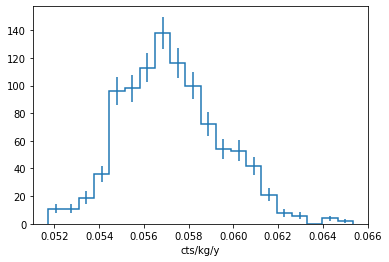

In [256]:
x = np.random.choice(len(pdf), size=1000, p=pdf)
resampled = np.zeros(len(counts))
for k in x:
    resampled[k] += 1
h_resampled = Hist.new.Regular(20, bins[0], bins[-1], name='cts/kg/y').Double()
h_resampled[:] = resampled
h_resampled.plot()
plt.show()